In [1]:
import sys
sys.path.append('../..')
import ugent

In [17]:
from pyslise import Pyslise
from math import cos, pi

y0 = (0, 1)
p = Pyslise(lambda x: 20*cos(2*x), 0, pi, tolerance=1e-14)
eigs = p.eigenvaluesByIndex(0, 12, y0, y0)
eigs

[(0, -13.936552479250086),
 (1, -2.382158235956996),
 (2, 7.986069144681663),
 (3, 17.38138067862304),
 (4, 26.76642636048006),
 (5, 37.41985877672419),
 (6, 50.05415721355725),
 (7, 64.80044029302154),
 (8, 81.62831318438315),
 (9, 100.50676946287842),
 (10, 121.41761934257431),
 (11, 144.35020800848935)]

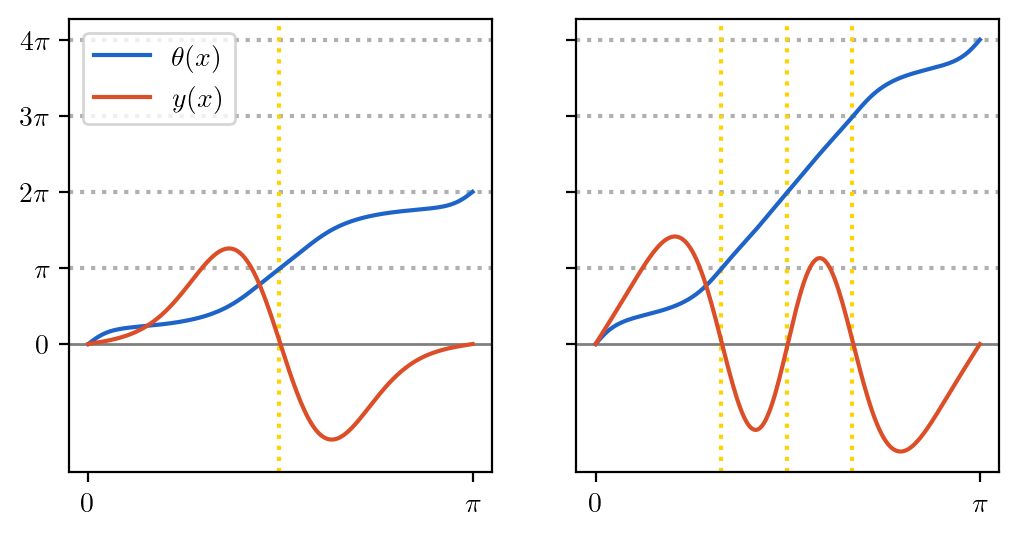

In [119]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(6,3), sharey=True, dpi=200)

xs = np.linspace(0, pi, 200)

for i, (s, E) in enumerate([(0.8, -2.382158235956996), (8, 17.38138067862304)]):
    ax = axes[i]
    ydys, theta = zip(*(p.propagate(E, y0, 0, x) for x in xs))
    theta = np.array(theta)
    ys, dys = map(np.array, zip(*ydys))

    ax.axhline(0, ls='-', color="gray", lw=1)
    for i in range(1, 10):
        if np.max(theta) <= pi * i:
            break
        v = xs[np.max(np.where(theta < pi*i))]
        
        ax.axvline(v, color=ugent.geel, ls=':')
    
    ax.plot(xs, theta, color=ugent.blauw, label="$\\theta(x)$")
    ax.plot(xs, s*ys, color=ugent.rood, label="$y(x)$")
    ax.set_xticks([0, pi])
    ax.set_xticklabels(["$0$", "$\\pi$"])
    ax.grid(axis='y', ls=':', which="minor", lw=1.5)
    
ticks = range(0, 5)
axes[0].set_yticks([pi*i for i in ticks if i > 0], minor=True)
axes[0].set_yticks([pi*i+0.001 for i in ticks])
axes[0].set_yticklabels(["$0$" if i == 0 else "$\\pi$" if i == 1 else "$-\\pi$" if i == -1 else f"${i}\\pi$" for i in ticks])
axes[0].legend(loc="upper left")
plt.savefig('prufer_curves.pdf', bbox_inches="tight")
plt.show()


In [66]:
np.where([False, False, False])

(array([], dtype=int64),)